In [3]:
from nltk.corpus import wordnet as wn
import networkx as nx
from IPython.display import Image

In [4]:
dog = wn.synset('dog.n.01')

In [5]:
dog.hypernyms()

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]

In [6]:
dog.hyponyms()

[Synset('basenji.n.01'),
 Synset('corgi.n.01'),
 Synset('cur.n.01'),
 Synset('dalmatian.n.02'),
 Synset('great_pyrenees.n.01'),
 Synset('griffon.n.02'),
 Synset('hunting_dog.n.01'),
 Synset('lapdog.n.01'),
 Synset('leonberg.n.01'),
 Synset('mexican_hairless.n.01'),
 Synset('newfoundland.n.01'),
 Synset('pooch.n.01'),
 Synset('poodle.n.01'),
 Synset('pug.n.01'),
 Synset('puppy.n.01'),
 Synset('spitz.n.01'),
 Synset('toy_dog.n.01'),
 Synset('working_dog.n.01')]

In [12]:
dog_t = dog.tree(lambda s:s.hypernyms())

In [13]:
type(dog_t[0])

nltk.corpus.reader.wordnet.Synset

In [14]:
dog_g = nx.DiGraph()

In [15]:
dog_t[2]

[Synset('domestic_animal.n.01'),
 [Synset('animal.n.01'),
  [Synset('organism.n.01'),
   [Synset('living_thing.n.01'),
    [Synset('whole.n.02'),
     [Synset('object.n.01'),
      [Synset('physical_entity.n.01'), [Synset('entity.n.01')]]]]]]]]

In [16]:
def add(self_node, parent_list,g, parent=True):
    for n in parent_list:
        g.add_node(n[0].name())
        if parent:
            g.add_edge(self_node.name(), n[0].name())
        else:
            g.add_edge(n[0].name(), self_node.name())
    return g
        
    

In [34]:
def add_recurse(node_list,g, parent=True):
    if len(node_list) > 1: 
        add(node_list[0], node_list[1:],g, parent=parent)
        for parent in node_list[1:]:
            add_recurse(parent,g, parent=parent)
    return g

In [18]:
dog_g = add_recurse(dog_t,dog_g)

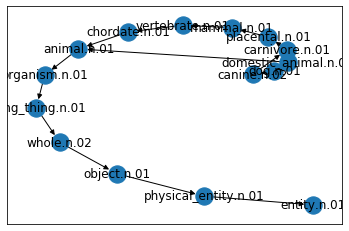

In [19]:
nx.draw_networkx(dog_g, pos=nx.spiral_layout(dog_g))

In [20]:
dog_a = nx.nx_agraph.to_agraph(dog_g)# just to draw using dot lib

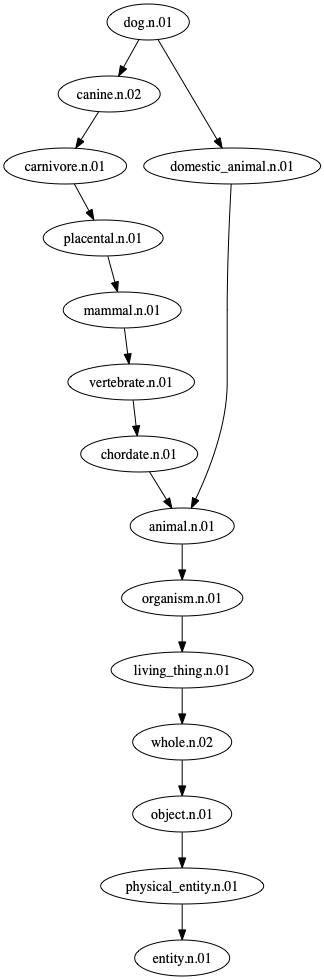

In [21]:
dog_a.layout('dot')
dog_a.draw('temp.png')
Image(filename='temp.png')

In [ ]:
cat = 

In [26]:
# hyponyms tree under  dog
dog_t_below = dog.tree(lambda s:s.hyponyms())

In [37]:
dog_t_below_g = nx.DiGraph()
dog_t_below_g = add_recurse(dog_t_below, dog_t_below_g, parent=False)

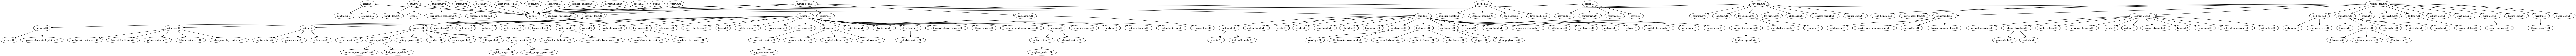

In [38]:
dog_t_below_a = nx.nx_agraph.to_agraph(dog_t_below_g)
dog_t_below_a.layout('dot')
dog_t_below_a.draw('temp.png')
Image(filename='temp.png')

In [29]:
dog_t_below

[Synset('dog.n.01'),
 [Synset('basenji.n.01')],
 [Synset('corgi.n.01'), [Synset('cardigan.n.02')], [Synset('pembroke.n.01')]],
 [Synset('cur.n.01'), [Synset('feist.n.01')], [Synset('pariah_dog.n.01')]],
 [Synset('dalmatian.n.02'), [Synset('liver-spotted_dalmatian.n.01')]],
 [Synset('great_pyrenees.n.01')],
 [Synset('griffon.n.02'), [Synset('brabancon_griffon.n.01')]],
 [Synset('hunting_dog.n.01'),
  [Synset('courser.n.03')],
  [Synset('dachshund.n.01'), [Synset('sausage_dog.n.01')]],
  [Synset('hound.n.01'),
   [Synset('afghan_hound.n.01')],
   [Synset('basset.n.01')],
   [Synset('beagle.n.01')],
   [Synset('bloodhound.n.01')],
   [Synset('bluetick.n.01')],
   [Synset('boarhound.n.01')],
   [Synset('coonhound.n.01'),
    [Synset('black-and-tan_coonhound.n.01')],
    [Synset('coondog.n.01')]],
   [Synset('foxhound.n.01'),
    [Synset('american_foxhound.n.01')],
    [Synset('english_foxhound.n.01')],
    [Synset('walker_hound.n.01')]],
   [Synset('greyhound.n.01'),
    [Synset('italian_g